# Retail Association Rule Minig

Objective: Through different transactions and attributes related to the online customer shopping in a retail store, we will find the likelihood of customers purchasing products with the combination of other products.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
dataframe_ =  pd.read_excel('retail.xlsx')
dataframe = dataframe_.copy()

In [4]:
dataframe_

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [5]:
dataframe_.shape

(541909, 8)

In [6]:
dataframe_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
dataframe_.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

There are 541909 rows and 8 columns in the dataset. </br>
The columns are of mixed data types. </br>
There are null values in some of the columns like CustomerId and Description. </br>

In [8]:
# Removing all the transactions that has null values in them.
dataframe.dropna(inplace=True)

In [9]:
dataframe.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
dataframe.shape

(406829, 8)

After removing null rows, we are left with 4086829 rows.

In [11]:
# Visualising customers Shopping Trend

<AxesSubplot:xlabel='month'>

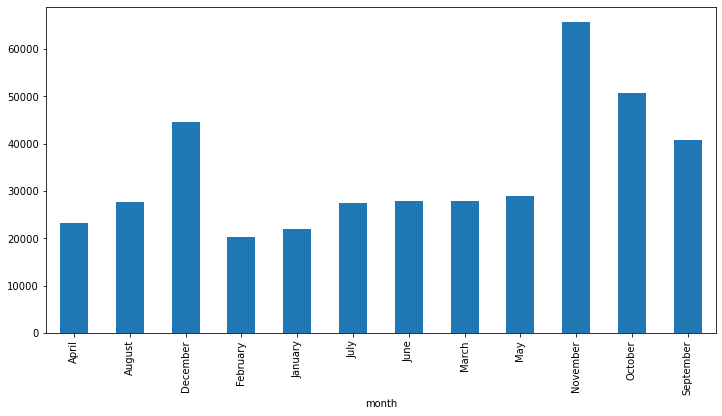

In [12]:
month_dataframe = pd.DataFrame()
month_dataframe['InvoiceNo'] = dataframe['InvoiceNo']
month_dataframe['month'] = pd.to_datetime(dataframe['InvoiceDate']).dt.month_name()
month_dataframe.groupby('month').count().plot(kind='bar', figsize=(12,6), legend=False)

Most of the customers shop around November, December and October. This could be possibly because of the different reasons such as Black Friday and Cyber Monday in November and Christmas in December.

In [13]:
# Visualising Country wise transactions.

<AxesSubplot:xlabel='Country'>

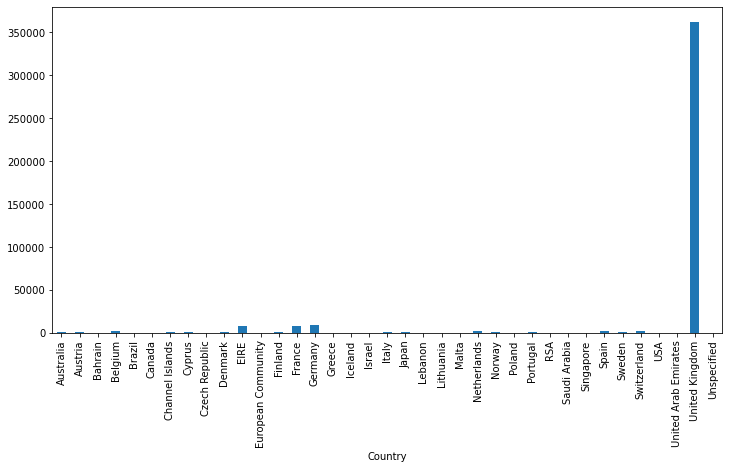

In [14]:
dataframe[['InvoiceNo', 'Country']].groupby('Country').count().plot(kind='bar', figsize=(12,6), legend=False)

Maximum and majority amount of the transactions are done by the customers based in the United Kingdom. We will analyse the rules for the items purchased by the United Kingdom customers.

In [15]:
uk_dataframe = dataframe.loc[dataframe.Country=='United Kingdom']
uk_dataframe.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [16]:
# Most Frequent Items Purchased by the customers in the UK.

<AxesSubplot:xlabel='Description'>

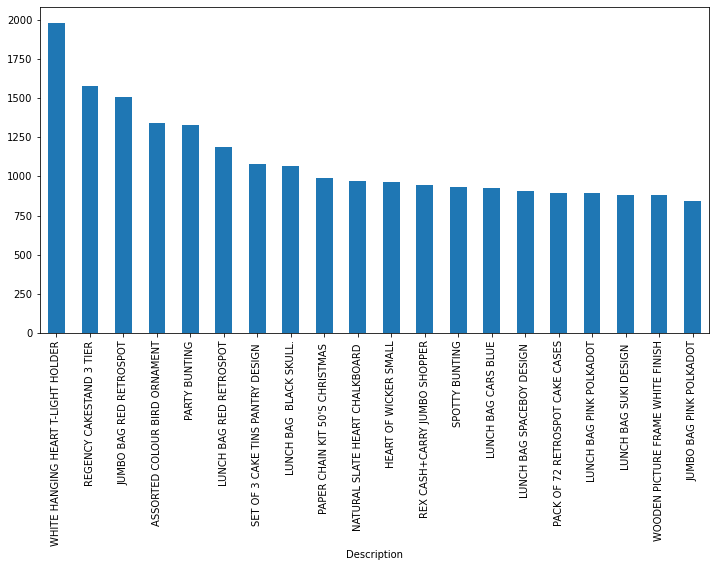

In [17]:
uk_dataframe[['InvoiceNo', 'Description']].groupby('Description').count().sort_values(by='InvoiceNo', ascending=False).head(20).plot(kind='bar', figsize=(12,6), legend=False)

These are the top 20 items purchased by the customers in the United Kingdom. WHITE HANGING HEART T-LIGHT HOLDER, JUMBO BAG RED RETROSPOT AND REGENCY CAKESTAND 3 TIER are few of the top shopped items in the online store.

In [18]:
# Data preparation

In [19]:
# Removing all those rows where InvoiceNo starts with C as they are of no use to us because these transactions are based on credits
dataframe['InvoiceNo'] = dataframe['InvoiceNo'].astype('str')
dataframe = dataframe[~dataframe['InvoiceNo'].str.contains('C')]

In [20]:
np.random.seed(11)

In [21]:
groupby_df = dataframe.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [22]:
groupby_df.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
groupby_df = groupby_df.applymap(lambda x: 0 if x<=0 else 1)
groupby_df.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Training Apriori Model

In [27]:
conda install mlxtend

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - mlxtend

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [26]:
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
itemset = apriori(groupby_df, min_support=0.025, use_colnames=True)

In [ ]:
itemset.sort_values("support",ascending=False)

Item WHITE HANGING HEART T-LIGHT HOLDER is purchased in approximately 10.5% of the overall transactions in the United Kingdom.

In [ ]:
rules = association_rules(itemset, metric ="lift", min_threshold = 1)

In [ ]:
rules = rules.sort_values(by='lift', ascending =False)

In [ ]:
rules.head(10)

consequents means something that happens or follows as a result of something else.</br>
antecedents means a thing or an event that exists or comes before another, and may have influenced it.

# Conclusion

With the help of Apriori algoritm, we can perform rule mining that helps us to find the relationship among purchased items and likelihood of a customer buying other items together.</br>

Item ROSES REGENCY TEACUP AND SAUCER is purchased in around 30% of the transactions with a lift of 18.53. This also helps us to find the customers buying this item will also buy GREEN REGENCY TEACUP AND SAUCER as the confidence score for the suggested purchase is 69%.</br>

Item ALARM CLOCK BAKELIKE RED can be considered as a good recommendation for the buyers purchasing ALARM CLOCK BAKELIKE GREEN as the confidence score for this purchase is approx 67%.</br>

Theses rules can be applied by the online stores to recommend and suggest other shopping items to the customers to increase the sale of the company.